### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypothesis Generation

here are some hypotehses:

Hypothesis 1: The sales of a product at a particular store are positively correlated with the product's MRP (Maximum Retail Price). This is because customers are more likely to buy a product if they believe it is a good value for the money.

Hypothesis 2: The sales of a product at a particular store are negatively correlated with the number of competing products in the same category. This is because customers have more options to choose from, which can lead to lower sales for individual products.

Hypothesis 3: The sales of a product at a particular store are positively correlated with the store's average customer spending. This is because stores that attract wealthier customers are more likely to sell more expensive products.

Hypothesis 4: The sales of a product at a particular store are negatively correlated with the distance of the store from the nearest competitor. This is because customers are more likely to shop at stores that are closer to them.

### Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r'C:\Users\oumai\Desktop\9961_14084_bundle_archive\Train.csv')
df_test = pd.read_csv(r'C:\Users\oumai\Desktop\9961_14084_bundle_archive\Test.csv')

In [2]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Exploratory Data Analysis

#### univariate analysis 

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


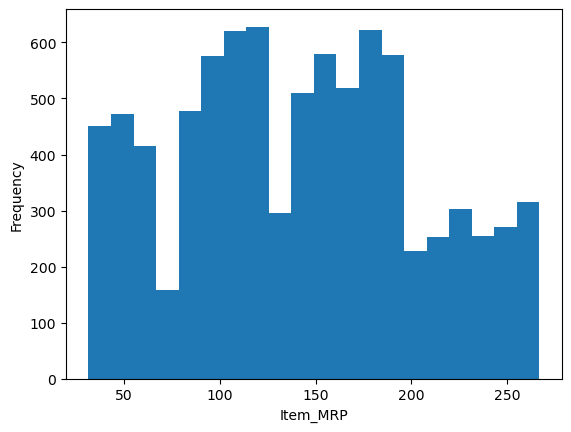

In [4]:
print(df_train.describe())

import matplotlib.pyplot as plt
plt.hist(df_train['Item_MRP'], bins=20)
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### bivariate analysis

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


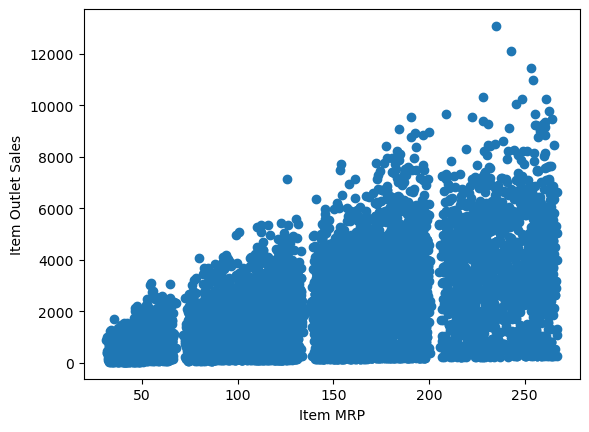

In [6]:
correlation_matrix = df_train.corr()
print(correlation_matrix)

# Scatter plot for sales vs item MRP
import matplotlib.pyplot as plt
plt.scatter(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

#### missing values

In [7]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

# Impute missing values
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


#### feature engineering

In [8]:
# Create a 'Total Sales' feature
df_train['Total_Sales'] = df_train.groupby('Item_Identifier')['Item_Outlet_Sales'].transform('sum')

In [9]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Total_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,41584.5364
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5173.2660
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10346.5320
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,18126.4050
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3923.5594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,25860.3378
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,15819.4080
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,7329.1264
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12406.5172


In [10]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#### encoding categorical variables

In [11]:
df_train.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1, inplace=True)
df_test.drop('Item_Identifier', axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Outlet_Size_LabelEncoded'] = le.fit_transform(df_train['Outlet_Size'])
df_test['Outlet_Size_LabelEncoded'] = le.fit_transform(df_test['Outlet_Size'])


# One Hot Encoding
df_train = pd.get_dummies(df_train, columns=['Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size'], drop_first=True)

In [13]:
df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Total_Sales,Outlet_Size_LabelEncoded,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small
0,9.300,0.016047,249.8092,1999,41584.5364,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,5.920,0.019278,48.2692,2009,5173.2660,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,10346.5320,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,19.200,0.000000,182.0950,1998,18126.4050,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,3923.5594,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,25860.3378,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,15819.4080,3,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8520,10.600,0.035186,85.1224,2004,7329.1264,2,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,2009,12406.5172,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [14]:
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_LabelEncoded,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small
0,20.750000,0.007565,107.8622,1999,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,8.300000,0.038428,87.3198,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,1985,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5677,7.600000,0.142991,169.1448,2009,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5679,15.300000,0.000000,214.6218,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### preprocessing data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['Item_Weight', 'Item_MRP']] = scaler.fit_transform(df_train[['Item_Weight', 'Item_MRP']])

In [16]:
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_LabelEncoded,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small
0,20.750000,0.007565,107.8622,1999,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,8.300000,0.038428,87.3198,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,1985,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5677,7.600000,0.142991,169.1448,2009,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5679,15.300000,0.000000,214.6218,2007,3,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Total_Sales', 'Outlet_Size_LabelEncoded',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_I

#### modeling

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Train models using df_train
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
rf = RandomForestRegressor()
xgboost = xgb.XGBRegressor()

# Assuming X_train, y_train are derived from df_train
target_column = 'Total_Sales'

# Extract features (X) and target variable (y)
X_train = df_train.drop(target_column, axis=1)  
y_train = df_train[target_column]  

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### predictions

In [20]:
lr_pred = lr.predict(df_test)
ridge_pred = ridge.predict(df_test)
lasso_pred = lasso.predict(df_test)
rf_pred = rf.predict(df_test)
xgboost_pred = xgboost.predict(df_test)